In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [17]:
x = np.linspace(-6.0, 6.0, 100)
y = np.sqrt(10**2 - x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [18]:
x1 = np.linspace(-6.0, 6.0, 100)
y1 = np.sqrt(4**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

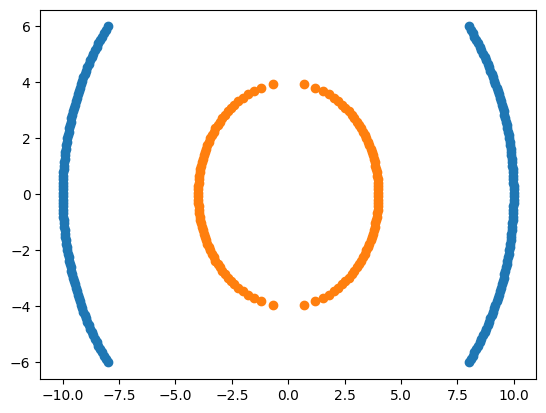

In [19]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [20]:
df1 = pd.DataFrame(np.vstack([y, x]).T, columns=['X1', 'X2'])
df1['Y'] = 0
df2 = pd.DataFrame(np.vstack([y1, x1]).T, columns=['X1', 'X2'])
df2['Y'] = 1
df = pd.concat([df1, df2], ignore_index=True)
df.head(5)

,X1,X2,Y
0,8.000000,-6.000000,0
1,8.089490,-5.878788,0
2,8.176205,-5.757576,0
3,8.260230,-5.636364,0
4,8.341649,-5.515152,0


In [21]:
df1 = df.copy()

In [23]:
df1 = df1.dropna()

In [24]:
df1["x1square"] = df1["X1"]**2
df1["x2square"] = df1["X2"]**2
df1["x1x2"] = df1["X1"]*df1["X2"]
df1.head()

,X1,X2,Y,x1square,x2square,x1x2
0,8.000000,-6.000000,0,64.000000,36.000000,-48.000000
1,8.089490,-5.878788,0,65.439853,34.560147,-47.556397
2,8.176205,-5.757576,0,66.850321,33.149679,-47.075117
3,8.260230,-5.636364,0,68.231405,31.768595,-46.557662
4,8.341649,-5.515152,0,69.583104,30.416896,-46.005457


In [25]:
X = df1[["x1square", "x2square", "x1x2"]]
y = df1['Y']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [29]:
X_train.head()

,x1square,x2square,x1x2
365,12.470156,3.529844,6.634584
17,84.481175,15.518825,-36.208404
267,11.500459,4.499541,7.193524
235,12.910927,3.089073,-6.315282
88,78.222222,21.777778,41.273553


In [30]:
import plotly.express as px

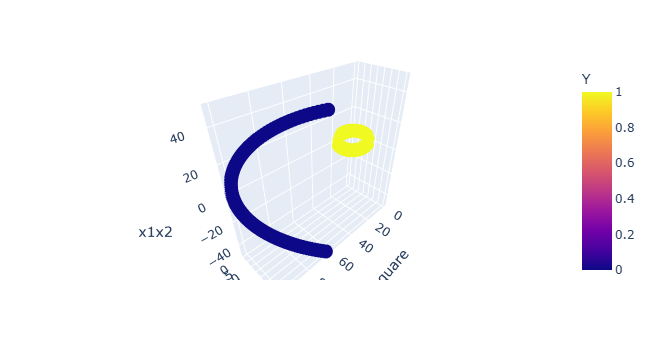

In [31]:
fig = px.scatter_3d(df1, x= "x1square", y = "x2square", z = "x1x2", color = "Y")
fig.show()

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
cls = SVC(kernel = 'linear') #why linear>> we have created polynomial
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [33]:
#till now we did manually
#we will be using SVC kernel's

df = df.dropna()

In [34]:
df.head()

,X1,X2,Y
0,8.000000,-6.000000,0
1,8.089490,-5.878788,0
2,8.176205,-5.757576,0
3,8.260230,-5.636364,0
4,8.341649,-5.515152,0


In [35]:
X = df[["X1", "X2"]]
y = df["Y"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [36]:
X_train

,X1,X2
365,-3.531311,-1.878788
17,9.191364,-3.939394
267,3.391233,2.121212
235,3.593178,-1.757576
88,8.844333,4.666667
...,...,...
220,1.792751,-3.575758
272,2.926087,2.727273
72,9.620914,2.727273
252,3.988505,0.303030


In [37]:
X_test

,X1,X2
59,9.933479,1.151515
319,-1.527225,3.696970
180,-9.291524,-3.696970
192,-8.570991,-5.151515
335,-3.593178,1.757576
...,...,...
39,9.918678,-1.272727
117,-9.191364,3.939394
78,9.384355,3.454545
127,-9.620914,2.727273


In [38]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
cls = SVC(kernel = 'poly') #why linear>> we have created polynomial
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
accuracy_score(y_test, y_pred)

0.62

In [39]:
#Ploy kernel didnt perform well, so we used rbf
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
cls = SVC(kernel = 'rbf') #why linear>> we have created polynomial
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [40]:
#sigmoid kernel
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
cls = SVC(kernel = 'sigmoid') #why linear>> we have created polynomial
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
accuracy_score(y_test, y_pred)

0.65